In [3]:
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import ylim
from sklearn import neighbors
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from operator import itemgetter
from itertools import groupby
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('assignment-data/data_for_student_case.csv', dtype={'bin':str, 'amount':int})
df = df.drop(['txid','bookingdate'], axis='columns')
df = df.rename(index=str, columns={'issuercountrycode':'issuercountry', 
                                   'bin':'issuer_id', 
                                   'shoppercountrycode':'shoppercountry', 
                                   'shopperinteraction':'interaction', 
                                   'cardverificationcodesupplied':'verification', 
                                   'cvcresponsecode':'cvcresponse', 
                                   'creationdate':'creationdate_stamp', 
                                   'simple_journal':'label'})

# Skip data if:
df = df[df['label']!='Refused']
df = df[~df['issuer_id'].str.contains('na', case=False)]
df = df[~df['mail_id'].str.contains('na', case=False)]

# Create and format (new) columns
df['creationdate'] = (pd.to_datetime(df['creationdate_stamp'])).dt.date
df['mail_id'] = pd.to_numeric(df['mail_id'].str.replace('email','')).astype(int)
df['ip_id'] = pd.to_numeric(df['ip_id'].str.replace('ip','')).astype(int)
df['card_id'] = pd.to_numeric(df['card_id'].str.replace('card','')).astype(int)

df['label'] = df['label'].apply(lambda x: '1' if x == 'Chargeback' else '0')



In [8]:
fraud_data = df[df['label']=='1']
benign_data = df[df['label']=='0']

In [10]:
converter = {
    'AUD': 0.702495,
    'GBP': 1.305505,
    'MXN': 0.05274,
    'NZD': 0.6632,
    'SEK': 0.104965
}
amounts = df.groupby('currencycode')['amount'].agg(['count'])
print(amounts)

               count
currencycode        
AUD            22710
GBP           180756
MXN            10156
NZD             4561
SEK            18515


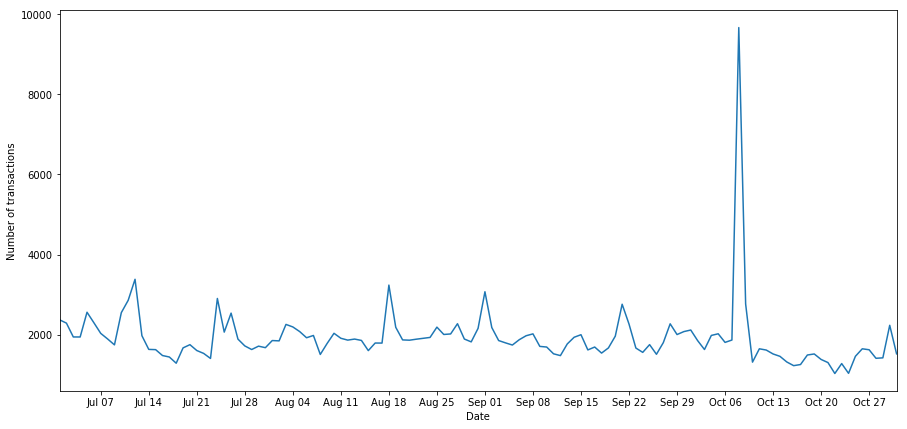

In [35]:
t_day = df.groupby('creationdate')['amount'].agg(['count'])

plt.figure(1, figsize=(15,7))
fig = plt.gcf()
ax = plt.gca()

t_day.plot(ax=ax)
ax.set(xlabel="Date", ylabel="Number of transactions")
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.get_legend().remove()

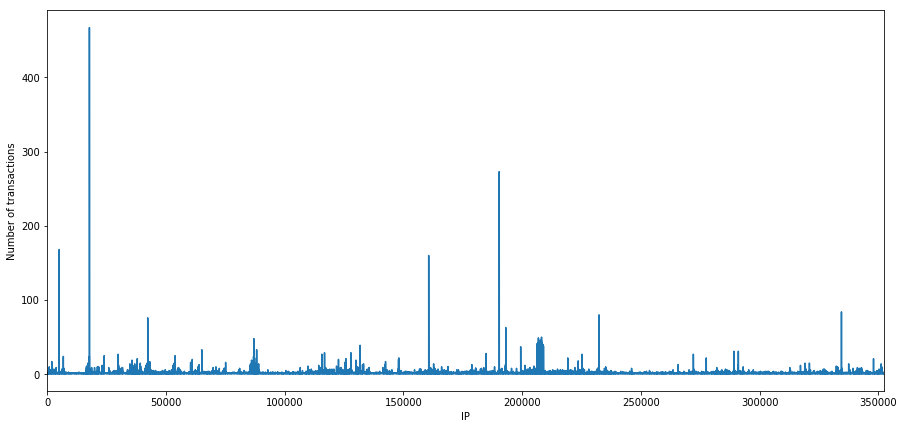

In [36]:
t_ip = df.groupby('ip_id')['amount'].agg(['count'])
t_ip = t_ip.sort_index()

plt.figure(2, figsize=(15,7))
fig = plt.gcf()
ax = plt.gca()

t_ip.plot(ax=ax)
ax.set(xlabel="IP", ylabel="Number of transactions")
ax.get_legend().remove()